In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Set seaborn style
sns.set(style="whitegrid")


In [2]:
# Cell 2: Load the dataset
data_file = pd.read_csv("/content/advertising.csv")
data_file.head(15)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [3]:
# Cell 3: Check dataset shape, basic info, and null values
print("Shape of dataset:", data_file.shape)
print("\nDataset Description:\n", data_file.describe())
print("\nNull values in each column:\n", data_file.isnull().sum())


Shape of dataset: (200, 4)

Dataset Description:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

Null values in each column:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [4]:
# Cell 3: Check dataset shape, basic info, and null values
print("Shape of dataset:", data_file.shape)
print("\nDataset Description:\n", data_file.describe())
print("\nNull values in each column:\n", data_file.isnull().sum())


Shape of dataset: (200, 4)

Dataset Description:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

Null values in each column:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


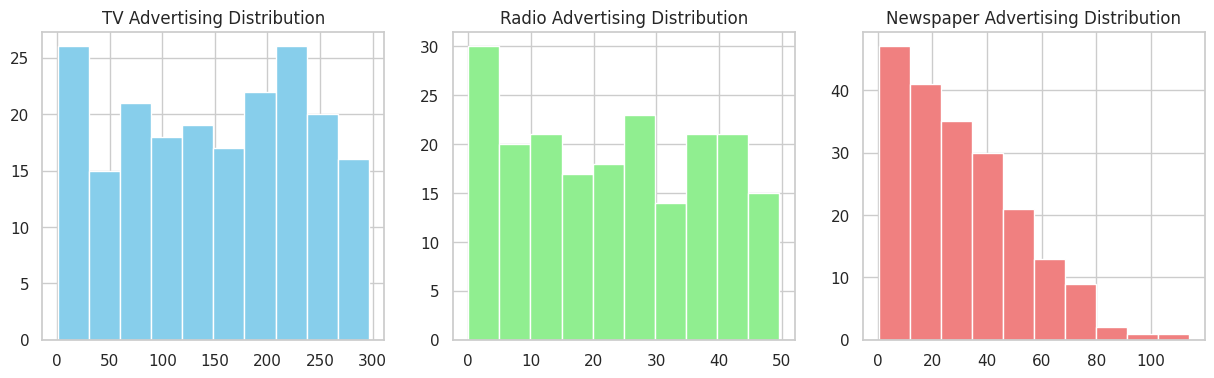

In [5]:
# Cell 4: Visualize distributions of each feature
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
data_file['TV'].hist(color='skyblue')
plt.title('TV Advertising Distribution')

plt.subplot(1,3,2)
data_file['Radio'].hist(color='lightgreen')
plt.title('Radio Advertising Distribution')

plt.subplot(1,3,3)
data_file['Newspaper'].hist(color='lightcoral')
plt.title('Newspaper Advertising Distribution')

plt.show()


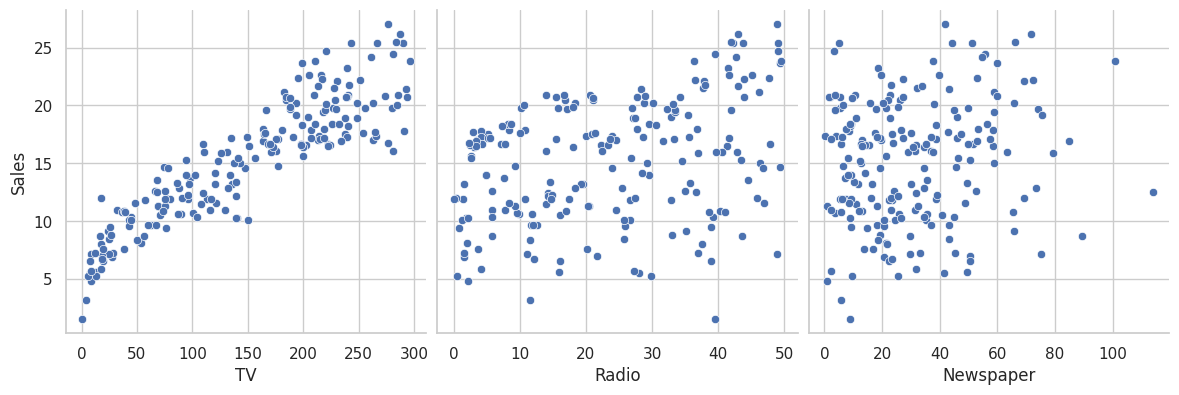

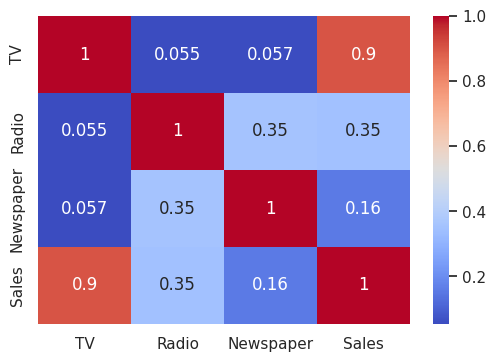

In [6]:
# Cell 5: Pairplot of features vs Sales
sns.pairplot(data_file, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', kind='scatter', height=4)
plt.show()

# Heatmap for correlation
plt.figure(figsize=(6,4))
sns.heatmap(data_file.corr(), annot=True, cmap='coolwarm')
plt.show()


In [7]:
# Cell 6: Split dataset into features and target
X = data_file.drop(columns='Sales')
Y = data_file['Sales']

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)


In [8]:
# Cell 7: Build and train linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Model intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 5.022730805826269
Coefficients: [ 0.05223455  0.10672463 -0.00120158]


In [9]:
# Cell 8: Predict sales on test set
prediction = model.predict(X_test)
prediction[:10]  # Show first 10 predictions


array([17.94221632, 11.28731032, 19.36406753, 15.25309499,  8.85035488,
       11.08345095, 24.54827272, 10.72184726, 18.64190205, 17.03877174])

In [10]:
# Cell 9: Model accuracy
accuracy_score = model.score(X_test, Y_test) * 100
print(f"Accuracy of model: {accuracy_score:.2f}%")


Accuracy of model: 88.78%
